# Sentiment Analysis on Swiss Newspaper Jupyter Notebook

_Giorgio Bakhiet Derias_
_I3a, Bachelorarbeit_

The aim of this notebook is to make an analysis of the sentiment about the different newspapers that can be read in Switzerland.

# Setup

In [1]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 7.1 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [2]:
!pip install tensorflow
!pip install -q tensorflow-text
!pip install tensorflow-gpu==2.4.0
!pip install gdown
!pip3 install ktrain
!pip3 install git+https://github.com/amaiya/eli5@tfkeras_0_10_1
!pip install plotly-express
!pip install jupyterlab "ipywidgets>=7.5"

     |████████████████████████████████| 394.8 MB 35 kB/s  eta 0:00:013
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp38-cp38-manylinux2014_x86_64.whl (3.8 MB)
     |████████████████████████████████| 2.9 MB 44.4 MB/s eta 0:00:01
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.34.1
    Uninstalling grpcio-1.34.1:
      Successfully uninstalled grpcio-1.34.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: p

In [3]:
!pip install voila
!pip install voila-gridstack

     |████████████████████████████████| 1.6 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 382 kB 13.5 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 68 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 427 kB 12.8 MB/s eta 0:00:01
  Attempting uninstall: tornado
    Found existing installation: tornado 6.0.4
    Uninstalling tornado-6.0.4:
      Successfully uninstalled tornado-6.0.4
     |████████████████████████████████| 217 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 10.9 MB/s eta 0:00:01


# Imports

In [4]:
# Numpy and Pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import re

# Plotly
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import rc
import plotly.graph_objects as go
# Tensorflow
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
#import tensorflow_text as text
from tensorflow.keras.utils import plot_model
# KTrain
import ktrain
from ktrain import text
# Seaborn
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
# Utily
import logging
from datetime import date
import time

--------------------------------------------------------------------
# Reload Model  

In [5]:
# reload predictor
predictor = ktrain.load_predictor('./modelsave/bertDe_predictor_93')
predictor.predict('Heute ist ein schöner Tag.')

'1'

# Find the bug!

## First text

Title with source at the end, without dot at end. = NEGATIVE

In [6]:
predictor.explain("Vitalik Buterin - Ethereum-Erfinder ist der jüngste Krypto-Milliardär der Welt - 20 Minuten")

Title with source at the end, with dot at end. = Positive

In [7]:
predictor.explain("Vitalik Buterin - Ethereum-Erfinder ist der jüngste Krypto-Milliardär der Welt - 20 Minuten.")

Title without source, without dot = positive

In [8]:
predictor.explain("Vitalik Buterin - Ethereum-Erfinder ist der jüngste Krypto-Milliardär der Welt")

Title without source , with dot at end. = positive +

In [9]:
predictor.explain("Vitalik Buterin - Ethereum-Erfinder ist der jüngste Krypto-Milliardär der Welt.")

Title+description, with - source = negative

In [10]:
predictor.explain("Vitalik Buterin - Ethereum-Erfinder ist der jüngste Krypto-Milliardär der Welt - 20 Minuten. Der Kurs der Kryptowährung Ethereum geht durch die Decke. Der 27-jährige Erfinder Vitalik Buterin ist darum zum Milliardär geworden.")

Title+descritpion, without "- source" = positive

In [11]:
predictor.explain("Vitalik Buterin - Ethereum-Erfinder ist der jüngste Krypto-Milliardär der Welt. Der Kurs der Kryptowährung Ethereum geht durch die Decke. Der 27-jährige Erfinder Vitalik Buterin ist darum zum Milliardär geworden.")

## Second text

In [12]:
predictor.explain("Postfinance und Swissquote bringen neue Banking-App «Yuh» - 20 Minuten")

In [13]:
predictor.explain("Postfinance und Swissquote bringen neue Banking-App «Yuh» - 20 Minuten.")

In [14]:
predictor.explain("Postfinance und Swissquote bringen neue Banking-App «Yuh»")

In [15]:
predictor.explain("Postfinance und Swissquote bringen neue Banking-App «Yuh».")

***The dot at the end of the sentence changes the meaning of the sentence!***

In [16]:
predictor.explain("Postfinance und Swissquote bringen neue Banking-App «Yuh» - 20 Minuten. Der Markt mit Smartphone-Banken ist hart umkämpft. Nun kommt ein neuer Anbieter: Mit der App Yuh wollen Postfinance und Swissquote «neue Wege» gehen.")

In [17]:
predictor.explain("Postfinance und Swissquote bringen neue Banking-App «Yuh». Der Markt mit Smartphone-Banken ist hart umkämpft. Nun kommt ein neuer Anbieter: Mit der App Yuh wollen Postfinance und Swissquote «neue Wege» gehen.")

***If I remove the source in the sentence I have better accuracy!***



***Adding the dot and removing the source improve accuracy***

# Newspaper

## Clean the source

In [18]:
def noop(src):
    return src

In [19]:
SOURCES = {
    '20 Minuten': noop,
    
    'Achgut.com': noop,
    'Aargauer Zeitung': noop,
    'Aargauerzeitung.ch': noop,
    'Aponet.de': noop,
    'aponet.de': noop,
    'Augsburger Allgemeine': noop,
    'aeroTELEGRAPH': noop,
    'Aerotelegraph.com': noop,
    
    'Bernerzeitung.ch': noop,
    'BZ Berner Zeitung': noop,
    'BLICK': noop,
    'Blick.ch': noop,
    'bluewin.ch': noop,
    'Bluewin.ch': noop,
    'BILD': noop,
    'Bild': noop,
    'BTC-ECHO': noop,
    'Btc-echo.de': 'BTC-ECHO',
    'B.Z. Berlin': noop,
    'Businessinsider.de': noop,
    'Business Insider Deutschland': noop,
    
    'CHIP Online Deutschland': noop,
    'CHIP Online':noop,
    'Cryptoticker.io': noop,
    'CryptoTicker.io - Bitcoin Kurs, Ethereum Kurs & Crypto News': noop,
    'ComputerBase': noop,
    'Cointelegraph Deutschland': noop,
    'Cointelegraph': noop,
    
    'DER AKTIONÄR': noop,
    'DER SPIEGEL': noop,
    'derStandard.at': noop,
    'DocCheck News': noop,
    'Die Achse des Guten': noop,
    'DIE WELT': noop,

    
    'Eurosport DE': noop,
    
    'Focus': noop,
    'FOCUS Online': noop,
    'Frankfurter Rundschau': noop,
    'Faz.net': noop,
    'FAZ - Frankfurter Allgemeine Zeitung': noop,
    'finews.ch': noop,
    'Finews.ch': noop,
    'futurezone.at': noop,
    'Frankfurt-Live.com': noop,
    'Frankfurt-live.com': noop,

    'GMX.ch': noop,
    'Www.gmx.ch': noop,
    'Goldreporter.de': noop,
    'Google News': noop,
    
    'Herzeblog.de': noop,
    'Heilpraxisnet.de': noop,
    'Herisau24': noop,
    'Herisau24.ch': noop,
    'heise online': noop,
    
    
    'kleinezeitung.at': noop,
    'Krone.at': noop,
    
    
    
    'IT Magazine': noop,
    'Itmagazine.ch': noop,
    
    'Luzerner Zeitung': noop,
    
    
    'Motorsport-Total.com': noop,
    'Motorsport-total.com': noop,
    
    'Neue Zürcher Zeitung': noop,
    'NDR.de': noop,
    'n-tv NACHRICHTEN': noop,
    'Nau.ch': noop,
    'Www.nau.ch': noop,
    
    
    'Oltner Tagblatt': noop,
    'ÖKO-TEST': noop,
   
    'PLUS 24': noop,
    'Puls24.at': noop,
    'Presseportal.de': noop,
    
    'Schweizer Radio und Fernsehen (SRF)':noop,
    'Www.srf.ch': 'Schweizer Radio und Fernsehen (SRF)',
    'Salzburger Nachrichten': noop,
    'Seniorweb Schweiz': noop,
    'Seniorweb.ch': noop,
    'SPEEDWEEK.COM': noop,
    'Speedweek.com': noop,
    'scinexx | Das Wissensmagazin': noop,
    'St.Galler Tagblatt': noop,
    'Spiegel Online': noop,
    
    
    'Tagesanzeiger.ch': noop,
    'Tageblatt-online': noop,
    'Tagblatt.ch': noop,
    'T3n': noop,
    't3n – digital pioneers': noop,
    't-online.de': noop,
    'Telebasel': noop,
    'Telebasel.ch': noop,
    
    'VOX Online': noop,
    'Www.vox.de': noop,
    
    'WELT Nachrichtensender': noop,
    'WirtschaftsWoche': noop,
    'Wirtschafts Woche': noop,
    'WELT': noop,
    'watson': noop,
    'Watson.ch': noop,
}


In [20]:
def cleanup_src(source):
    if source not in SOURCES:
        logging.warn("Unknown source %s, leaving as-is", source)
        print("'"+source+"':"+ source.lower())
    return SOURCES.get(source, noop)(source)

In [21]:
def cleanup_source(text):
    text = text.lower()
    # replacement
    #text = text.replace("WWww","www")
    text = text.replace("aargauerzeitung.ch", "aargauer zeitung")
    text = text.replace("aerotelegraph.com","aerotelegraph")
    text = text.replace('auto-motor-und-sport.de', 'auto motor und sport')
    
    text = text.replace("bernerzeitung.ch", "bz berner zeitung")
    text = text.replace("blick.ch","blick")
    text = text.replace("btc-echo.de","btc-echo")
    text = text.replace("btc-echo | bitcoin & blockchain pioneers", "btc-echo")
    text = text.replace("businessinsider.de", "business insider deutschland")
    
    text = text.replace("cointelegraph","cointelegraph deutschland")
    text = text.replace("chip online deutschland","chip online")
    text = text.replace("cryptoticker.io - bitcoin kurs, ethereum kurs & crypto news", "cryptoticker.io")    
    
    text = text.replace("doccheck.com","doccheck news")
    
    text = text.replace("eurosport.de","eurosport de")
    text = text.replace("focus","focus online")
    text = text.replace("faz.net","faz - frankfurter allgemeine zeitung")
    text = text.replace("www.fr.de","frankfurter rundschau")
    
    text = text.replace("www.gmx.ch","gmx.ch")
    
    text = text.replace("herisau24.ch", "herisau24")
    text = text.replace("itmagazine.ch","it magazine")  
    text = text.replace('idee-fuer-mich.de', 'idee für mich') 
    
    text = text.replace("kleinezeitung.at","kleine zeitung")
    text = text.replace('kurier.at', 'kurier')
    
    text = text.replace("luzernerzeitung.ch","luzerner zeitung")
    
    text = text.replace("www.nau.ch","nau.ch")
    text = text.replace("n-tv.de","n-tv nachrichten")
    
    text = text.replace("www.ndr.de","ndr.de")
    text = text.replace("www.nzz.ch","neue zürcher zeitung")
    text = text.replace("oltnertagblatt.ch","oltner tagblatt")
    text = text.replace("oekotest.de","öko-test")
   
    text = text.replace("www.srf.ch","srf")
    text = text.replace("schweizer radio und fernsehen (srf)","srf")
    text = text.replace("spiegel online","der spiegel")
    text = text.replace("www.sn.at","salzburger nachrichten")
    text = text.replace("seniorweb.ch","seniorweb schweiz")  
    
    text = text.replace("t3n","t3n – digital pioneers")
    text = text.replace("t-online.de","t-online")
    text = text.replace("tageblatt.de","tageblatt-online")
    text = text.replace("tagesanzeiger.ch","tages-anzeiger")
    text = text.replace("telebasel.ch","telebasel")
    
    text = text.replace("www.vox.de","vox online")
    text = text.replace("watson.ch","watson")
    
    return text

In [22]:
def clean_src(df):
     # clean sources
    source_apply = df.apply(
        lambda row : cleanup_source(row['source']),
        axis = 1
    )
    
    # reassign column source
    df['source'] = source_apply
    
    return df

## Load the dataset

In [23]:
def openNewsPaper(s):
    # import the csv file  
    df = pd.read_csv("./Newspaper/total"+s+".csv",parse_dates=['publishedAt'], encoding='utf8', error_bad_lines=False, warn_bad_lines=True, header=0)
    df = df[df['source'].notnull()]
    df = df[df['title'].notnull()]
    df = df[df['description'].notnull()]   
    df['source'] = df['source'].astype(str)
    df['title'] = df['title'].astype(str)
    df['description'] = df['description'].astype(str)
    df['source'] = df['source'].str.lower()
    df = clean_src(df)
        
    # merge the columns title and description in a columnt 'content'
    df['content'] = df[['title', 'description']].apply(lambda x: '. '.join(x), axis=1)
    
    # create a new column target to save the predictions
    df['sentiment'] = predictor.predict(df['content'].tolist())
    df['sentiment'] = df['sentiment'].astype(str)
    
    # resample the dataframe and return it
    df_target = df[['source','content','category','publishedAt','sentiment']]
    return df_target

## Prediction on newspaper dataset

In [24]:
news = openNewsPaper("_concat")

### Count predictions

In [25]:
news['sentiment'].value_counts()

0    9303
1    6458
Name: sentiment, dtype: int64

In [26]:
len(news)

15761

### Remove duplicates

In [27]:
news = news.drop_duplicates(subset=['content'], ignore_index=True)

In [28]:
len(news)

3512

In [29]:
news['sentiment'].value_counts()

0    2081
1    1431
Name: sentiment, dtype: int64

### Clean date column 

In [31]:
data = news.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   source       3512 non-null   object             
 1   content      3512 non-null   object             
 2   category     3512 non-null   object             
 3   publishedAt  3512 non-null   datetime64[ns, UTC]
 4   sentiment    3512 non-null   object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 137.3+ KB


In [32]:
data

,source,content,category,publishedAt,sentiment
0,20 minuten,Verletzung im Schädelinneren : Frau lief nach ...,world,2021-05-01 19:01:07+00:00,0
1,blick,USA: Freizeitpark wieder auf. 13 Monate lang w...,world,2021-05-01 08:28:47+00:00,1
2,20 minuten,Verdacht auf Menschenschmuggel : US-Polizei fi...,world,2021-05-01 00:37:51+00:00,0
3,20 minuten,Australien macht ernst : Bis zu fünf Jahre Gef...,world,2021-04-30 20:31:47+00:00,0
4,blick,Indonesien: Veronika Troshina droht Knast wege...,world,2021-04-30 18:30:13+00:00,0
...,...,...,...,...,...
3507,t-online,RKI-Zahlen in Deutschland: Bundesweite Sieben-...,science,2021-05-14 03:18:41+00:00,0
3508,bild,Thüringen: Wie ein Wirt ganz legal die Corona-...,science,2021-05-13 18:14:05+00:00,0
3509,augsburger allgemeine,Vorsicht: Ausgekugelte Schulter nie selbst beh...,health,2021-05-13 14:36:53+00:00,0
3510,www.rtl.de,Covid-19 ist doch keine Atemwegserkrankung - L...,health,2021-05-12 17:19:00+00:00,1


In [33]:
data['date_parsed'] = data['publishedAt'].dt.strftime('%Y-%m-%d')

In [34]:
data= data.drop(columns='publishedAt')
data

,source,content,category,sentiment,date_parsed
0,20 minuten,Verletzung im Schädelinneren : Frau lief nach ...,world,0,2021-05-01
1,blick,USA: Freizeitpark wieder auf. 13 Monate lang w...,world,1,2021-05-01
2,20 minuten,Verdacht auf Menschenschmuggel : US-Polizei fi...,world,0,2021-05-01
3,20 minuten,Australien macht ernst : Bis zu fünf Jahre Gef...,world,0,2021-04-30
4,blick,Indonesien: Veronika Troshina droht Knast wege...,world,0,2021-04-30
...,...,...,...,...,...
3507,t-online,RKI-Zahlen in Deutschland: Bundesweite Sieben-...,science,0,2021-05-14
3508,bild,Thüringen: Wie ein Wirt ganz legal die Corona-...,science,0,2021-05-13
3509,augsburger allgemeine,Vorsicht: Ausgekugelte Schulter nie selbst beh...,health,0,2021-05-13
3510,www.rtl.de,Covid-19 ist doch keine Atemwegserkrankung - L...,health,1,2021-05-12


In [35]:
news_concat = data.copy()

In [36]:
pd.set_option('display.max_colwidth', None)

### How many sources?

In [37]:
news.source.unique()

array(['20 minuten', 'blick', 'neue schweizer zeitung', 'srf',
       'neue zürcher zeitung', 'speedweek.com', 'watson',
       'tages-anzeiger', 'landbote.ch', 'merkur.de', 'tagblatt.ch',
       'telebasel', 'aerotelegraph', 'auto motor und sport',
       'inside paradeplatz', 'btc-echo', 'inside digital',
       'chinahandys.net', 'chip online', ' cash', 'www.rtl.de',
       'schweizer-illustrierte.ch', 'bluewin.ch', 'nau.ch', 'gmx.ch',
       'real total', 'der spiegel', 'futurezone.at', 't-online',
       'faz - frankfurter allgemeine zeitung', 'nzzas.nzz.ch',
       'hardwareluxx.de', 'bild', 'die welt', 'frankfurter rundschau',
       'oe24', 'scinexx | das wissensmagazin', 'heilpraxisnet.de',
       'infranken.de', 'heidelberg24.de', 'presseportal.de',
       'frankfurt-live.com', 'www.swr.de', 'insuedthueringen.de',
       'chemie-zeitschrift.at', 'frankenpost.de', 'np-coburg.de',
       'hna.de', 'kreisbote', 'aargauer zeitung',
       'schiffe und kreuzfahrten - das kreuzfahr

In [38]:
news_concat

,source,content,category,sentiment,date_parsed
0,20 minuten,Verletzung im Schädelinneren : Frau lief nach Corona-Test Hirnwasser aus dem Kopf. In Osnabrück ist eine Frau beim Corona-Schnelltest im Inneren ihres Schädels verletzt worden. Danach lief ihr wochenlang Hirnwasser aus dem Kopf.,world,0,2021-05-01
1,blick,"USA: Freizeitpark wieder auf. 13 Monate lang war Disneyland wegen der Corona-Pandemie stillgelegt, nun hat der beliebte Freizeitpark in Kalifornien wieder auf.",world,1,2021-05-01
2,20 minuten,"Verdacht auf Menschenschmuggel : US-Polizei findet 91 Menschen ohne Papiere in Wohnhaus. Auf Hinweis einer Entführung finden Polizeibeamte in Houston, im US-Bundesstaat Texas, 91 Frauen und Männer ohne gültige Aufenthaltspapiere.",world,0,2021-05-01
3,20 minuten,"Australien macht ernst : Bis zu fünf Jahre Gefängnis für Heimkehrer aus Hochrisikogebieten. Australien plant radikale Massnahmen für Personen, die illegal aus Corona-Hochrisikogebieten wie Indien einreisen: Ihnen könnte künftig bis zu fünf Jahren Gefängnis drohen.",world,0,2021-04-30
4,blick,Indonesien: Veronika Troshina droht Knast wegen Porno-Dreh auf Bali. Für den Dreh eines Amateur-Sexclips haben sich die Russin Veronika Troshina (22) und ihr Partner ausgerechnet einen heiligen Berg auf Bali ausgesucht. Dafür sucht sie nun die Polizei,world,0,2021-04-30
...,...,...,...,...,...
3507,t-online,RKI-Zahlen in Deutschland: Bundesweite Sieben-Tage-Inzidenz sinkt auf unter 100. Erstmals seit dem 20. März vermeldet das RKI eine Sieben-Tage-Inzidenz unter dem kritischen Schwellenwert. Auch die Zahl der gemeldeten Neuinfektionen liegt deutlich unter der Vorwoche.,science,0,2021-05-14
3508,bild,Thüringen: Wie ein Wirt ganz legal die Corona-Regeln umgeht. Gotha (Thüringen) – Allein in den letzten Tagen wurden über 600 Gäste bekocht – Trotz Notbremse und Inzidenz weit über 200.,science,0,2021-05-13
3509,augsburger allgemeine,"Vorsicht: Ausgekugelte Schulter nie selbst behandeln. Eine ausgekugelte Schulter ist ausgesprochen schmerzhaft und das Einkugeln mitunter abenteuerlich. Damit alles wieder dahin kommt, wo es hingehört, hat der Arzt...",health,0,2021-05-13
3510,www.rtl.de,"Covid-19 ist doch keine Atemwegserkrankung - Lauterbach: ""wichtige Studie"" - RTL Online. Eine neue Studie zeigt nun, dass die besonderen Spike-Proteine auch bei der durch das Coronavirus ausgelösten Covid-19-Erkrankung eine Schlüsselrolle spielen.",health,1,2021-05-12


In [39]:
#export df
news_concat.to_csv('news_concat.csv')

# Plot the data
Now that the data has been imported, predicted and cleaned I can start to analyse it, to do this I will use plolty.
In order to display the data correctly I will first have to normalise it, I have written two functions for this purpose.

In [40]:
def normalize(df):
    # copy the data
    df_max_scal = df.copy()

    # apply normalization techniques
    for column in df_max_scal.columns:
        df_max_scal['sentiment %'] = (df_max_scal['count'] / df_max_scal['count'].sum())*100
        
    df_max_scal['sentiment %'] = df_max_scal['sentiment %'].round(decimals=2)
    return df_max_scal
    

In [41]:
def norm(x):
    x['sentiment %'] = (x['count'] /x['count'].sum())*100   
    x['sentiment %'] = x['sentiment %'].round(decimals=2)
    return x  

## Plot total positive vs negative

In [42]:
tot= news_concat.groupby(['sentiment']).size().reset_index()
tot['sentiment'] = tot['sentiment'].astype(str)
tot = tot.rename(columns={0:'count'})
tot = normalize(tot)

In [43]:
tot

,sentiment,count,sentiment %
0,0,2081,59.25
1,1,1431,40.75


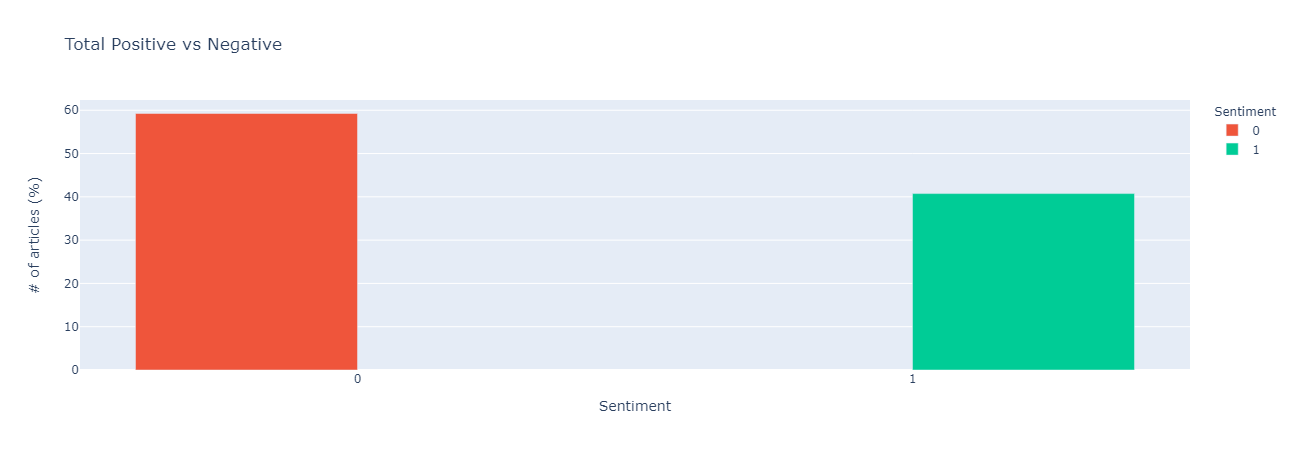

In [109]:
figTotal = px.bar(tot,
                  x="sentiment",
                  y="sentiment %",
                  barmode="group",
                  color="sentiment",
                  color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                    },
                  labels={
                      "sentiment": "Sentiment",
                      "sentiment %": "# of articles (%)",
                      "sentiment": "Sentiment"
                  },
                  title="Total Positive vs Negative"
                  )

figTotal.show()

## Plot all newspaper positive vs negative per total count

In [45]:
grouped= news_concat.groupby(['source','sentiment']).size().reset_index()
grouped['sentiment'] = grouped['sentiment'].astype(str)
grouped = grouped.rename(columns={0:'count'})
grouped = normalize(grouped)
grouped

,source,sentiment,count,sentiment %
0,cash,0,26,0.74
1,cash,1,18,0.51
2,technik smartphone news,0,1,0.03
3,11freunde.de,0,1,0.03
4,20 minuten,0,358,10.19
...,...,...,...,...
351,xboxdynasty,0,1,0.03
352,xboxdynasty,1,1,0.03
353,xboxdynasty.de,1,1,0.03
354,youtube,0,1,0.03


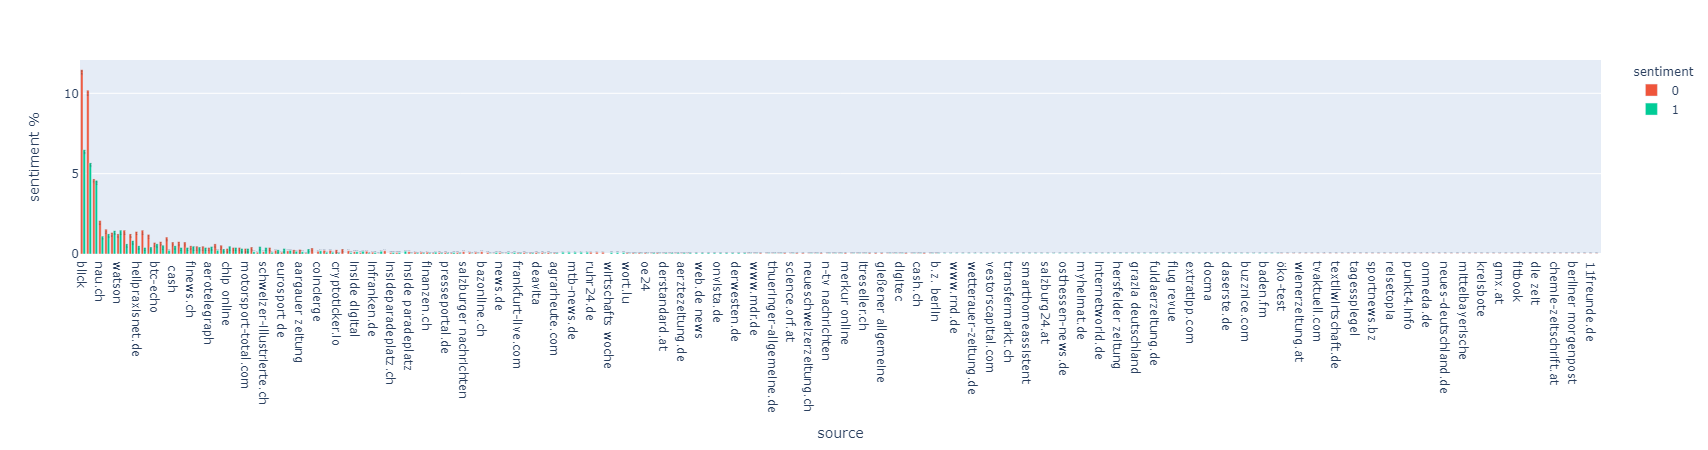

In [46]:
figNews = px.bar(grouped,
                 x="source",
                 y="sentiment %",
                 text = "sentiment %",
                 barmode="group",
                 color="sentiment",
                 color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                    },
                 #facet_col='source', facet_col_wrap=4
                 #facet_row="targetTitle", 
                 #facet_col="category",
                  )
figNews.update_layout(xaxis={'categoryorder':'total descending'})
figNews.show()

## Plot all newspaper positive vs negative per effective positività o negatività

In [47]:
grouped.source.value_counts()

focus online                  2
frankenpost.de                2
gesundheitsstadt-berlin.de    2
btc-echo                      2
wallstreet-online             2
                             ..
flug revue                    1
coin-update                   1
docma                         1
kreisbote                     1
tv aktuell                    1
Name: source, Length: 251, dtype: int64

In [48]:
# I take newspapers with more than tot articles, if a newspaper's category is missing I delete it.
clean = grouped.loc[grouped['count'] > 21]

In [49]:
# activate this only if you want a newspaper with both sentiment 
#clean = clean[clean['source'].map(clean['source'].value_counts()) > 1]

In [50]:
df20 = clean.loc[clean['source'] == '20 minuten']
df20 = normalize(df20)
display(df20)

,source,sentiment,count,sentiment %
4,20 minuten,0,358,64.27
5,20 minuten,1,199,35.73


In [51]:
clean = clean.groupby(['source']).apply(norm).reset_index(drop=True)

In [52]:
clean

,source,sentiment,count,sentiment %
0,cash,0,26,100.00
1,20 minuten,0,358,64.27
2,20 minuten,1,199,35.73
3,augsburger allgemeine,0,44,60.27
4,augsburger allgemeine,1,29,39.73
5,bild,0,37,100.00
6,blick,0,403,63.87
7,blick,1,228,36.13
8,bluewin.ch,0,47,47.96
9,bluewin.ch,1,51,52.04


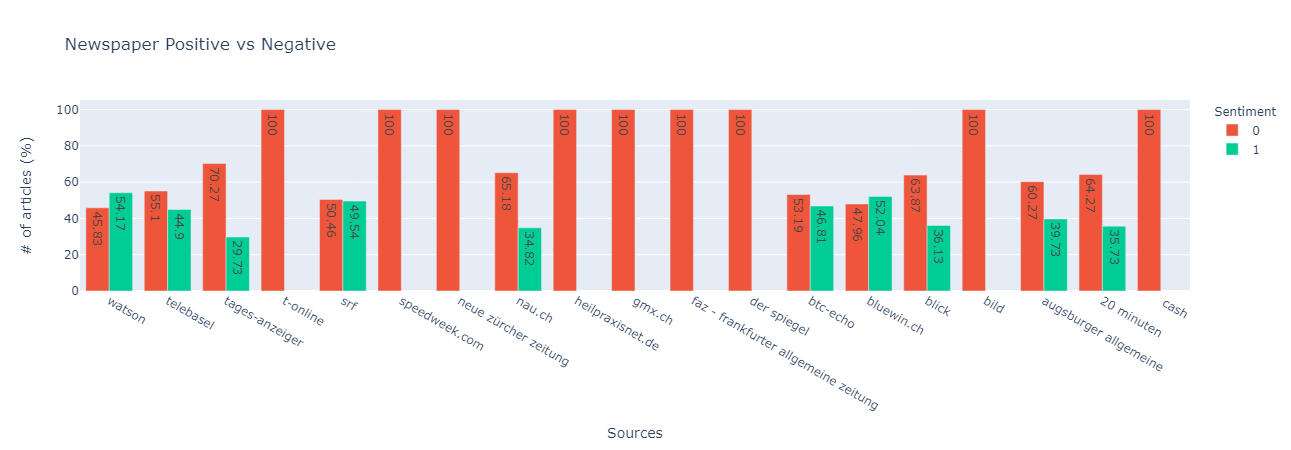

In [112]:
figNews = px.bar(clean,
                 x="source",
                 y="sentiment %",
                 text = "sentiment %",
                 barmode="group",
                 color="sentiment",
                 color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                    },
                 labels={
                      "source": "Sources",
                      "sentiment %": "# of articles (%)",
                      "sentiment": "Sentiment"
                  },
                  title="Newspaper Positive vs Negative"
                  )
                  
figNews.update_layout(xaxis={'categoryorder':'total descending'})
figNews.show()

## Plot top 10 newspaper positive vs negative

In [54]:
# plot newspaper best positive 10
gr10Pos = clean.loc[clean['sentiment'] == '1']
gr10Pos = gr10Pos.sort_values(by=['sentiment %'], ascending=False)

In [56]:
gr10Pos

,source,sentiment,count,sentiment %
28,watson,1,52,54.17
9,bluewin.ch,1,51,52.04
21,srf,1,161,49.54
11,btc-echo,1,22,46.81
26,telebasel,1,44,44.90
4,augsburger allgemeine,1,29,39.73
7,blick,1,228,36.13
2,20 minuten,1,199,35.73
17,nau.ch,1,39,34.82
24,tages-anzeiger,1,22,29.73


In [57]:
# plot newspaper best negative 10
gr10Neg = clean.loc[clean['sentiment'] == '0']
gr10Neg = gr10Neg.sort_values(by=['sentiment %'], ascending=[False])

In [58]:
gr10Neg = gr10Neg.head(10)
gr10Neg

,source,sentiment,count,sentiment %
0,cash,0,26,100.00
12,der spiegel,0,26,100.00
22,t-online,0,52,100.00
19,speedweek.com,0,27,100.00
18,neue zürcher zeitung,0,43,100.00
15,heilpraxisnet.de,0,49,100.00
13,faz - frankfurter allgemeine zeitung,0,27,100.00
14,gmx.ch,0,22,100.00
5,bild,0,37,100.00
23,tages-anzeiger,0,52,70.27


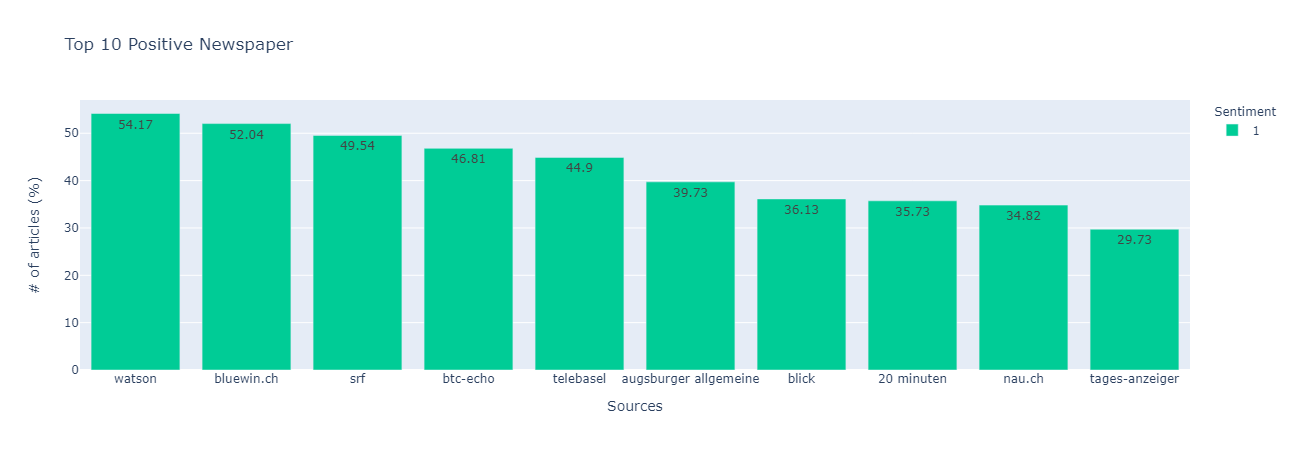

In [113]:
figNews10 = px.bar(gr10Pos,
                   x="source",
                   y="sentiment %",
                   text = "sentiment %", 
                   barmode="group",
                   color="sentiment",
                   color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                    },
                   labels={
                      "source": "Sources",
                      "sentiment %": "# of articles (%)",
                      "sentiment": "Sentiment"
                  },
                  title="Top 10 Positive Newspaper"
                  )

figNews10.show()

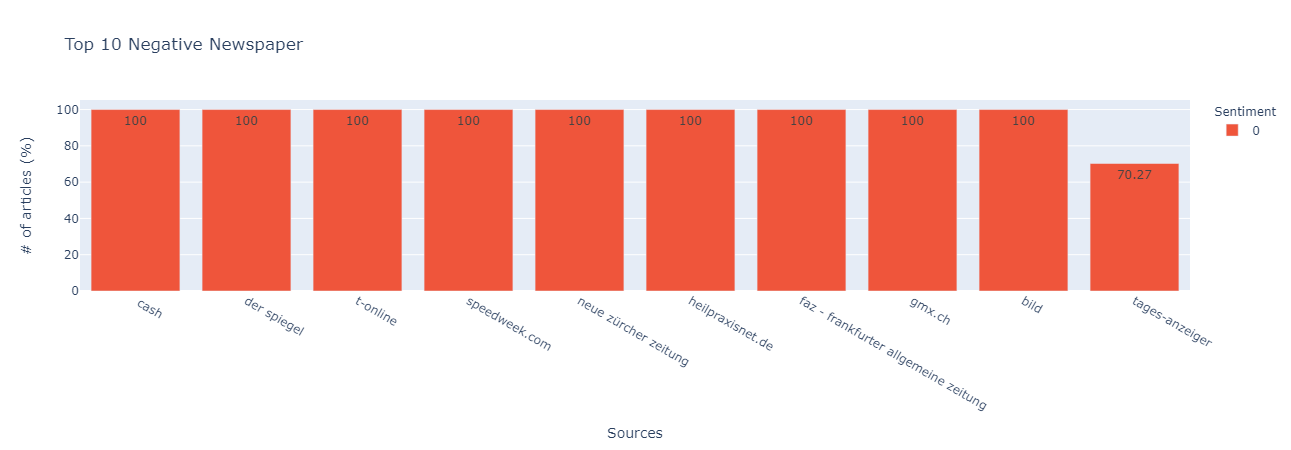

In [114]:
figNews10 = px.bar(gr10Neg,
                   x="source",
                   y="sentiment %",
                   text = "sentiment %", 
                   barmode="group",
                   color="sentiment",
                   color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                    },
                   labels={
                      "source": "Sources",
                      "sentiment %": "# of articles (%)",
                      "sentiment": "Sentiment"
                   },
                   title="Top 10 Negative Newspaper"
                  )

figNews10.show()

## Plot total positive vs negative pro category

In [61]:
category = news_concat.groupby(['category','sentiment']).size().reset_index()
category['sentiment'] = category['sentiment'].astype(str)
category = category.rename(columns={0:'count'})
#normalize on the dataset
category = normalize(category)
category

,category,sentiment,count,sentiment %
0,business,0,145,4.13
1,business,1,147,4.19
2,entertainment,0,206,5.87
3,entertainment,1,175,4.98
4,health,0,281,8.00
5,health,1,153,4.36
6,nation,0,180,5.13
7,nation,1,53,1.51
8,science,0,309,8.80
9,science,1,193,5.50


In [62]:
# normalize single category
category_clean = category.groupby(['category']).apply(norm).reset_index(drop=True)

In [63]:
category_clean

,category,sentiment,count,sentiment %
0,business,0,145,49.66
1,business,1,147,50.34
2,entertainment,0,206,54.07
3,entertainment,1,175,45.93
4,health,0,281,64.75
5,health,1,153,35.25
6,nation,0,180,77.25
7,nation,1,53,22.75
8,science,0,309,61.55
9,science,1,193,38.45


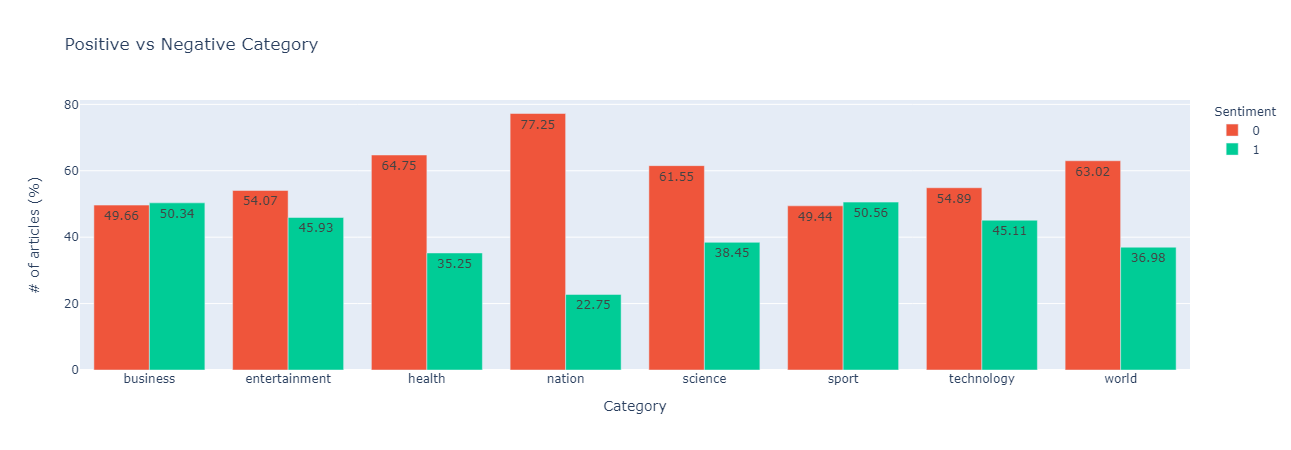

In [115]:
figCat = px.bar(category_clean, 
                x="category", 
                y="sentiment %",
                text = "sentiment %", 
                barmode="group",
                color="sentiment",
                color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                },
                labels={
                      "category": "Category",
                      "sentiment %": "# of articles (%)",
                      "sentiment": "Sentiment"
                  },
                  title="Positive vs Negative Category"
                )

figCat.show()


**At the moment I don't have enough data so I will only consider the 3 biggest sources**

In [65]:
newspaper_source = [
    '20 minuten',
    'blick',
    'srf',
]

In [66]:
news_small = news_concat[news_concat.source.isin(newspaper_source)]

In [67]:
sourceCat = news_small.groupby(['source','category','sentiment']).size().reset_index()
sourceCat['sentiment'] = sourceCat['sentiment'].astype(str)
sourceCat = sourceCat.rename(columns={0:'count'})
# normalized only on category
sourceCat = sourceCat.groupby(['category']).apply(norm).reset_index(drop=True)
sourceCat

,source,category,sentiment,count,sentiment %
0,20 minuten,business,0,24,21.62
1,20 minuten,business,1,21,18.92
2,20 minuten,entertainment,0,36,19.15
3,20 minuten,entertainment,1,53,28.19
4,20 minuten,health,0,1,100.00
5,20 minuten,nation,0,77,37.75
6,20 minuten,nation,1,17,8.33
7,20 minuten,science,0,9,20.00
8,20 minuten,science,1,10,22.22
9,20 minuten,sport,0,38,12.34


In [68]:
# the right normalization
sourceClean = sourceCat.groupby(['source','category']).apply(norm).reset_index(drop=True)

In [69]:
sourceClean

,source,category,sentiment,count,sentiment %
0,20 minuten,business,0,24,53.33
1,20 minuten,business,1,21,46.67
2,20 minuten,entertainment,0,36,40.45
3,20 minuten,entertainment,1,53,59.55
4,20 minuten,health,0,1,100.00
5,20 minuten,nation,0,77,81.91
6,20 minuten,nation,1,17,18.09
7,20 minuten,science,0,9,47.37
8,20 minuten,science,1,10,52.63
9,20 minuten,sport,0,38,65.52


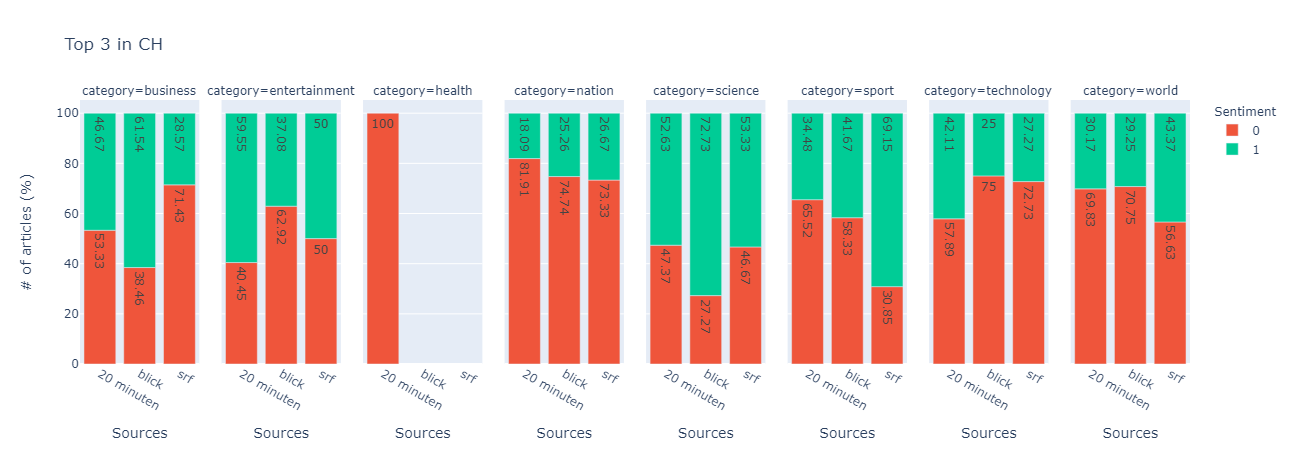

In [116]:
figCat = px.bar(sourceClean,
                x="source",
                y="sentiment %",
                text = "sentiment %", 
                #barmode="group",
                color="sentiment",
                color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                },
                #facet_row='sentiment', 
                facet_col="category",
                #facet_col_wrap=4
                #facet_row="targetTitle", 
                #facet_col="category",
                labels={
                    "source": "Sources",
                    "sentiment %": "# of articles (%)",
                    "sentiment": "Sentiment"
                  },
                title="Top 3 in CH"
                )

figCat.show()

For visualisation I create a minus value for "negative" values

In [72]:
sourceClean2 = sourceClean.copy()

In [73]:
sourceClean2['sentiment %'] = sourceClean2['sentiment %'] * (2 * sourceClean2['sentiment'].astype(int) - 1)

In [74]:
sourceClean2

,source,category,sentiment,count,sentiment %
0,20 minuten,business,0,24,-53.33
1,20 minuten,business,1,21,46.67
2,20 minuten,entertainment,0,36,-40.45
3,20 minuten,entertainment,1,53,59.55
4,20 minuten,health,0,1,-100.00
5,20 minuten,nation,0,77,-81.91
6,20 minuten,nation,1,17,18.09
7,20 minuten,science,0,9,-47.37
8,20 minuten,science,1,10,52.63
9,20 minuten,sport,0,38,-65.52


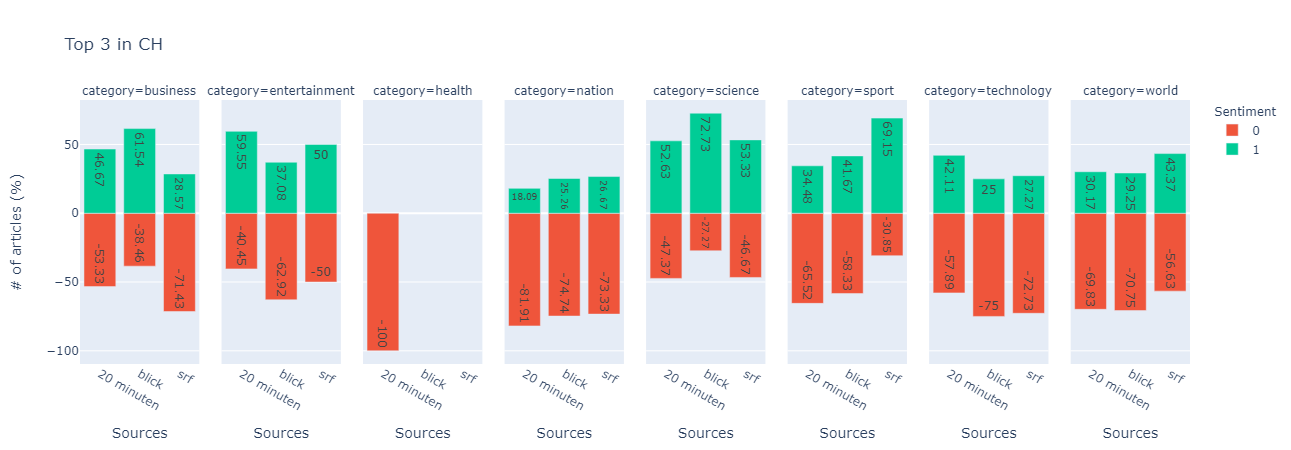

In [117]:
figCat = px.bar(sourceClean2,
                x="source",
                y="sentiment %",
                text = "sentiment %", 
                #barmode="group",
                color="sentiment",
                color_discrete_map={
                    '0': '#ef553b',
                    '1': '#00cc96'
                },
                #facet_row='sentiment', 
                facet_col="category",
                #facet_col_wrap=4
                #facet_row="targetTitle", 
                #facet_col="category",
                labels={
                    "source": "Sources",
                    "sentiment %": "# of articles (%)",
                    "sentiment": "Sentiment"
                  },
                title="Top 3 in CH"
                )

figCat.show()

## Plot single newspaper spider per category 


In [76]:
sourceCat = news_concat.groupby(['source','category','sentiment']).size().reset_index()
sourceCat['sentiment'] = sourceCat['sentiment'].astype(str)
sourceCat = sourceCat.rename(columns={0:'count'})
sourceCat = sourceCat.groupby(['category']).apply(norm).reset_index(drop=True)
sourceCat

,source,category,sentiment,count,sentiment %
0,cash,technology,0,26,11.06
1,cash,technology,1,18,7.66
2,technik smartphone news,health,0,1,0.23
3,11freunde.de,sport,0,1,0.19
4,20 minuten,business,0,24,8.22
...,...,...,...,...,...
548,xboxdynasty,technology,0,1,0.43
549,xboxdynasty,technology,1,1,0.43
550,xboxdynasty.de,world,1,1,0.11
551,youtube,science,0,1,0.20


## Def for plotting SPIDER

In [118]:
def plot_spider(df_name):
    d_name = str(df_name)
    df_name = sourceCat.loc[sourceCat['source'] == d_name ]
    df_name = df_name.groupby(['category']).apply(norm).reset_index(drop=True)
    df_name_pos = df_name.loc[df_name['sentiment'] == '1']
    df_name_neg = df_name.loc[df_name['sentiment'] == '0']
    
    label_neg = d_name + " NEG %"
    label_pos = d_name +" POS %"
    
    fig = go.Figure()
    fig.add_trace(go.Scatterpolar(
            r=df_name_neg['sentiment %'],
            theta=df_name_neg['category'], 
            fill='toself',
            mode = 'markers',
            name= label_neg,
            line_color = '#ef553b'
    ))
    fig.add_trace(go.Scatterpolar(
            r=df_name_pos['sentiment %'],
            theta=df_name_pos['category'], 
            fill='toself',
            mode = 'markers',
            name= label_pos ,
            line_color = '#00cc96'
        ))


    fig.update_layout(
        title = 'Spider Comparison: '+ d_name,
        showlegend = True
    )

    fig.show()

### Plot spider

In [119]:
list_newspaper = [
    '20 minuten',
    'blick',
    'bluewin.ch',
    'finews.ch',
    'nau.ch',
    'neue zürcher zeitung',
    'srf',
    'telebasel',
    'tages-anzeiger',
    'watson'
]

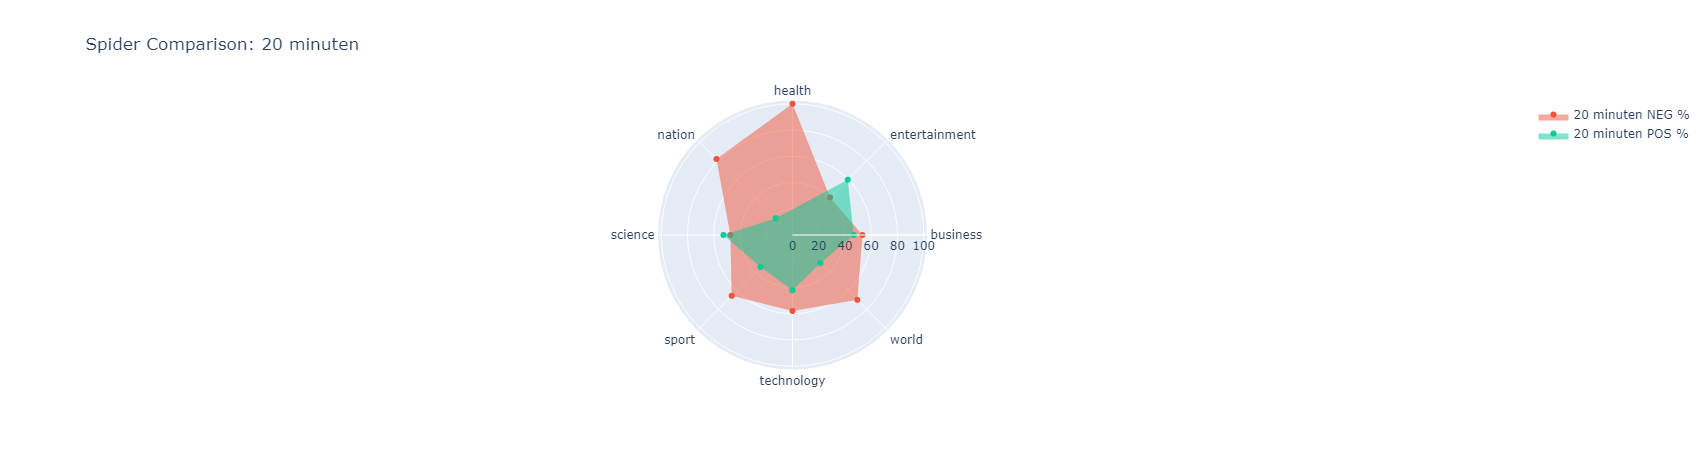

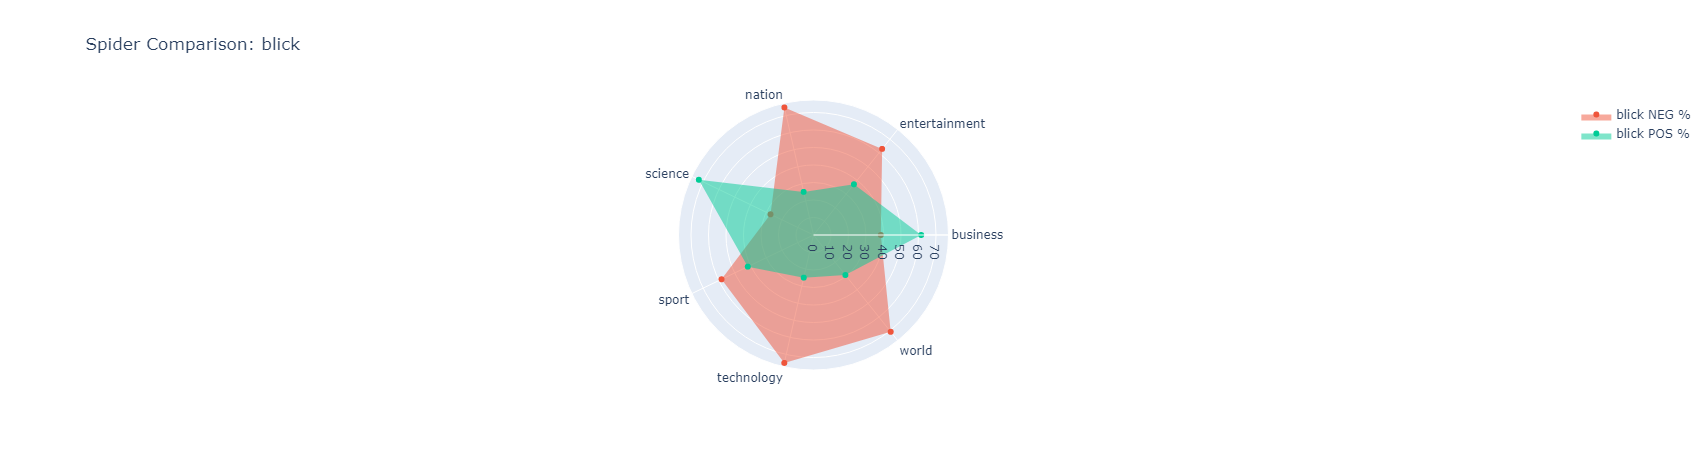

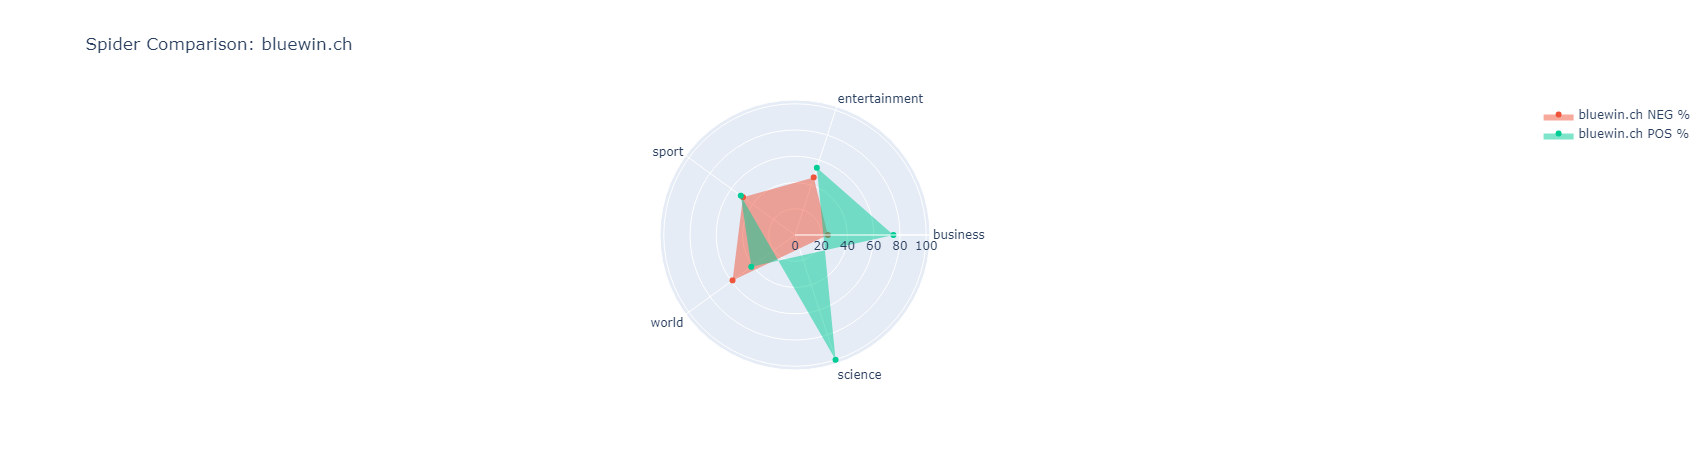

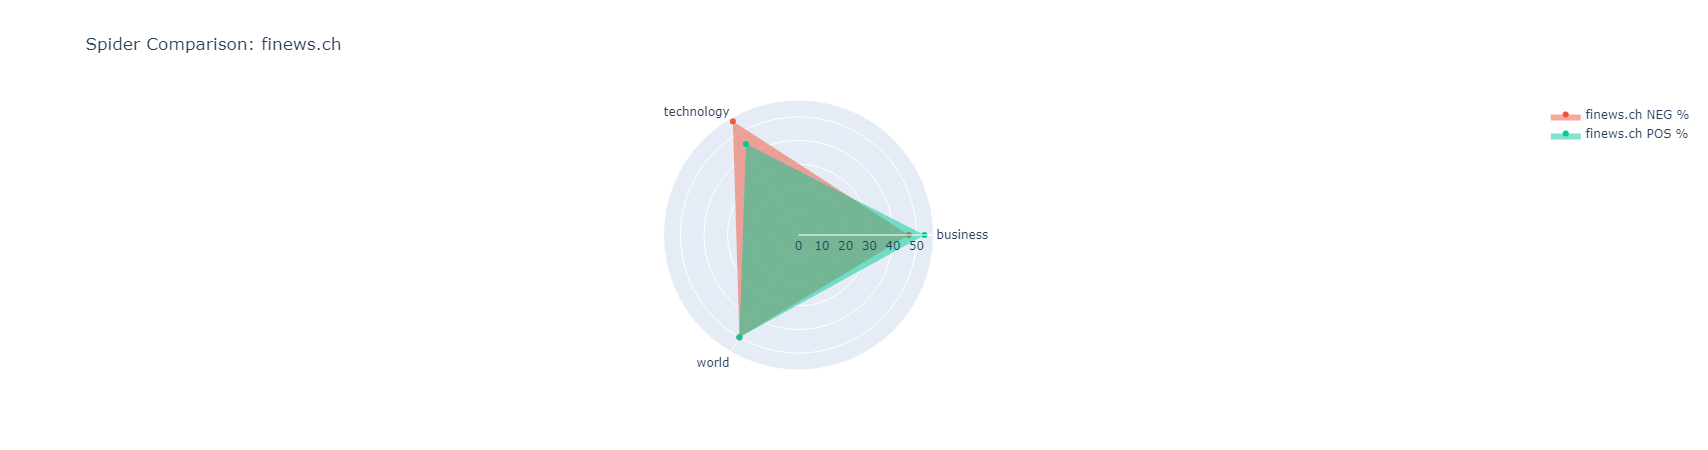

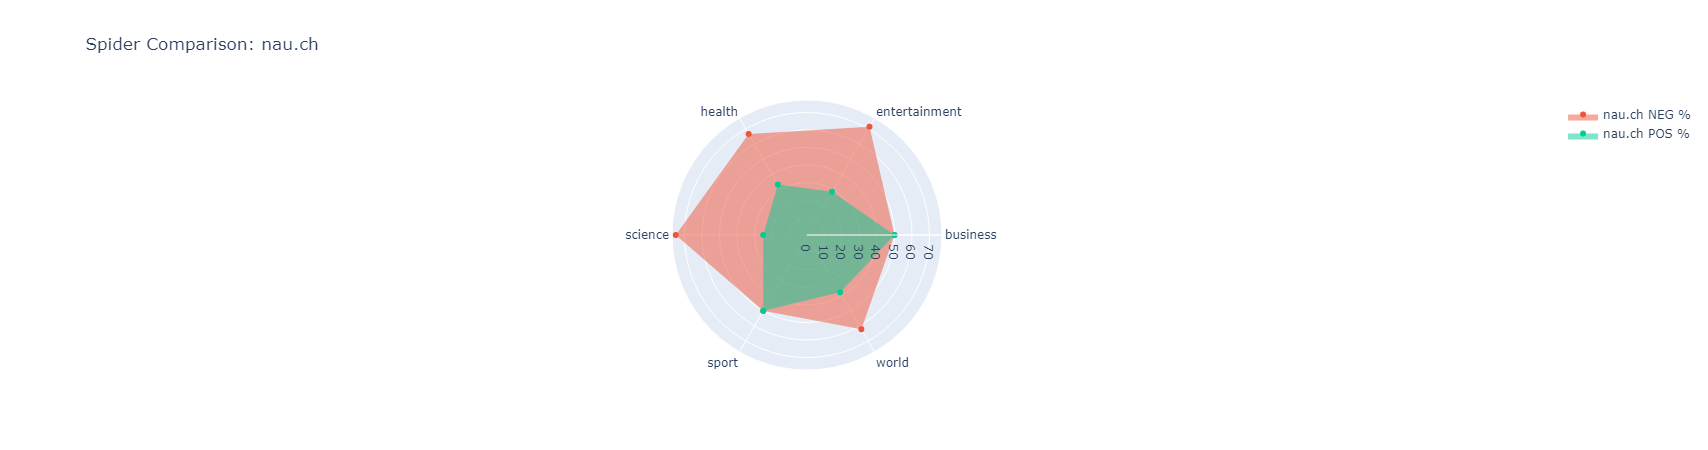

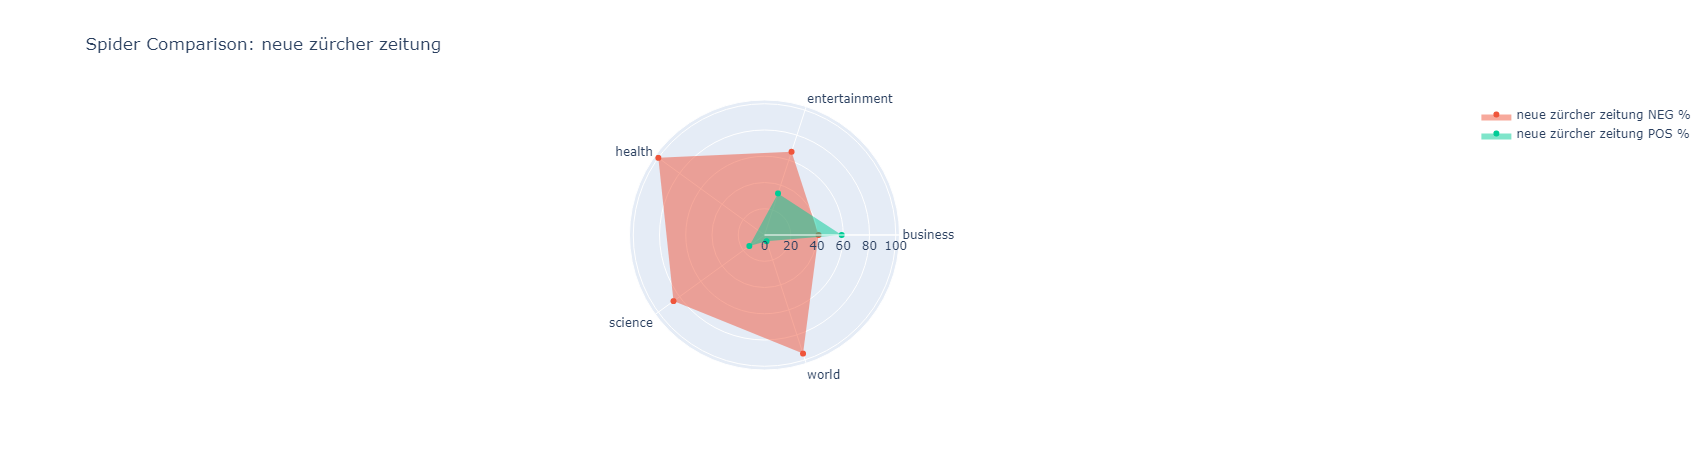

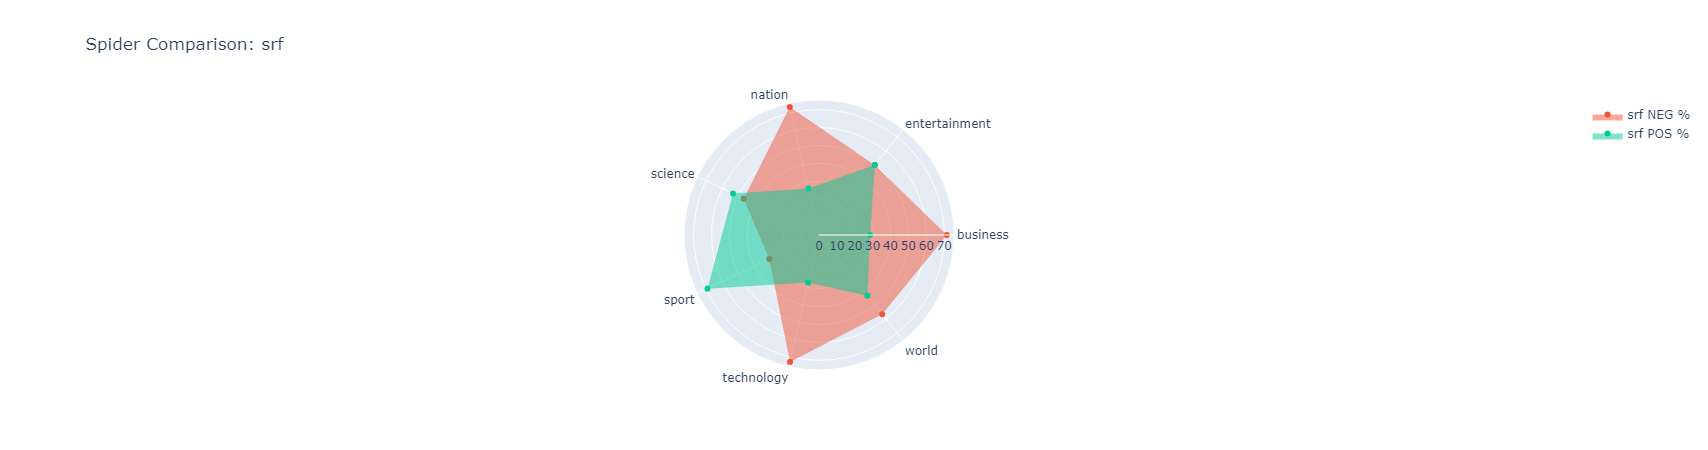

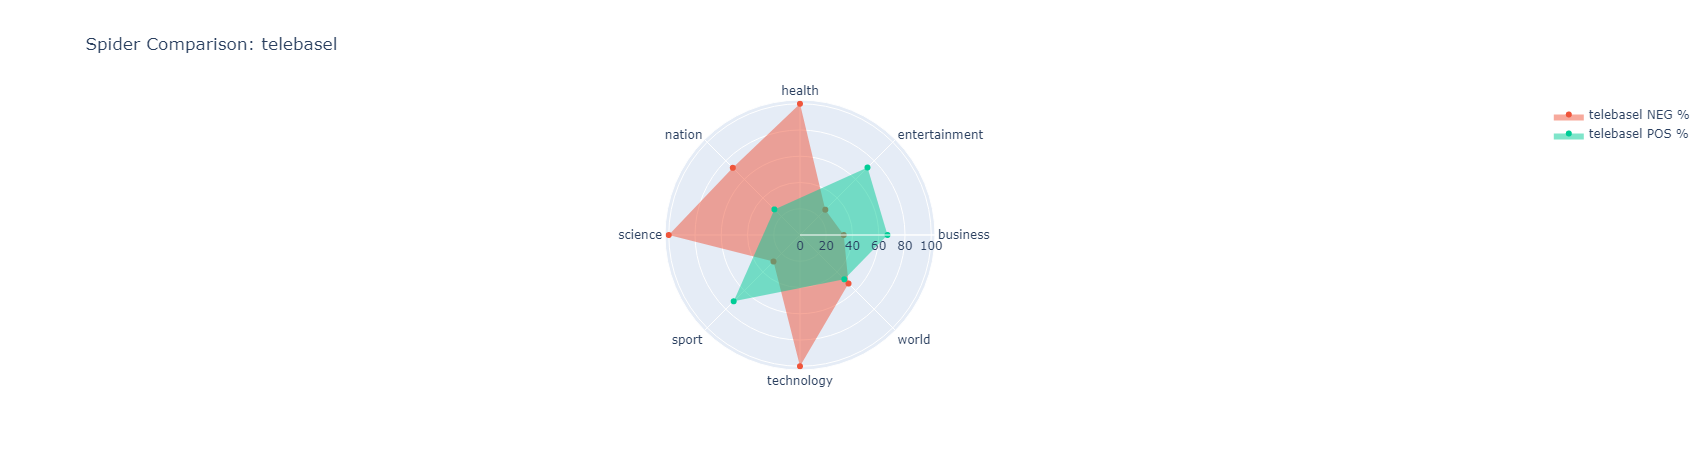

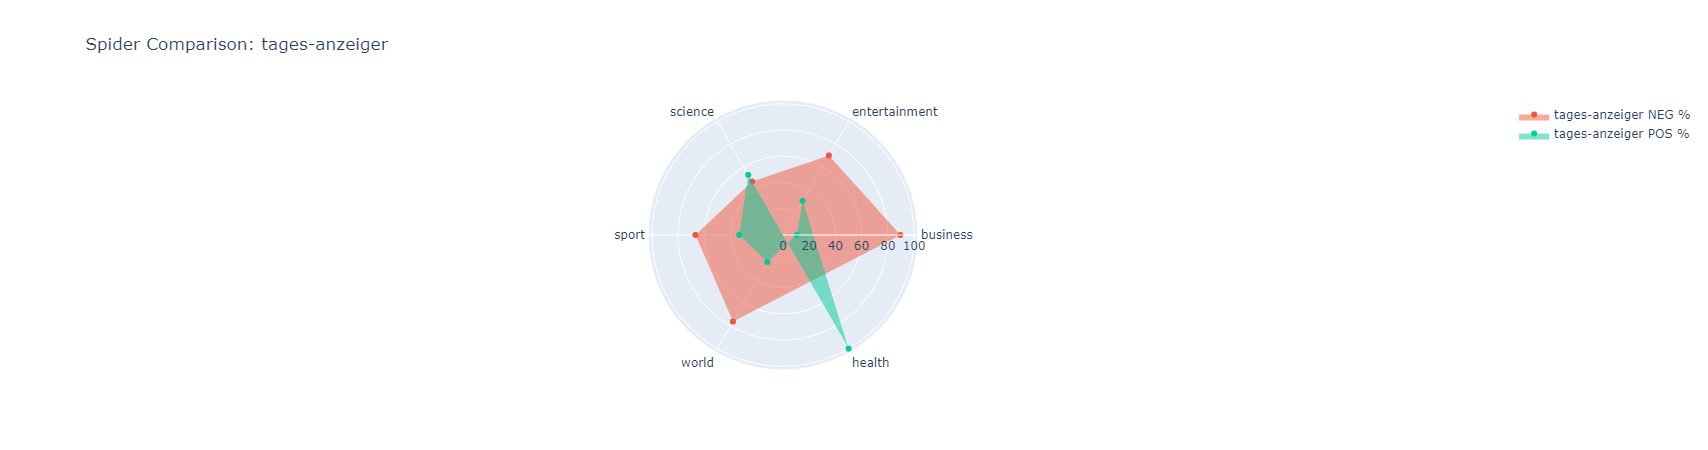

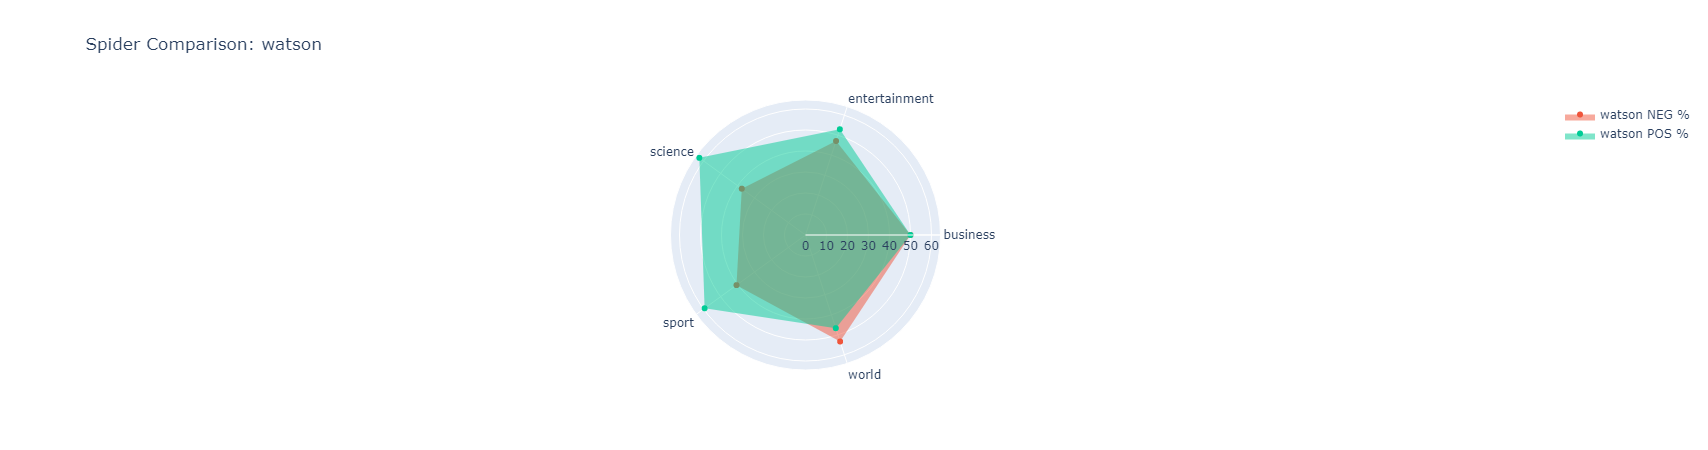

In [79]:
for x in list_newspaper:
    plot_spider(x)

### How I created the spider graph before the function, step by step (do not run)
#### 20 min

In [376]:
# per giornale
df_20min = sourceCat.loc[sourceCat['source'] == '20 minuten']

In [377]:
df_20min = df_20min.groupby(['category']).apply(norm).reset_index(drop=True)
df_20min

,source,category,sentiment,count,sentiment %
0,20 minuten,business,0,11,44.00
1,20 minuten,business,1,14,56.00
2,20 minuten,entertainment,0,22,46.81
3,20 minuten,entertainment,1,25,53.19
4,20 minuten,nation,0,44,78.57
5,20 minuten,nation,1,12,21.43
6,20 minuten,science,0,6,54.55
7,20 minuten,science,1,5,45.45
8,20 minuten,sport,0,23,69.70
9,20 minuten,sport,1,10,30.30


In [378]:
# creo df positivi e negativi con % giuste
df_20min_pos = df_20min.loc[df_20min['sentiment'] == '1']
df_20min_neg = df_20min.loc[df_20min['sentiment'] == '0']

In [379]:
df_20min_neg

,source,category,sentiment,count,sentiment %
0,20 minuten,business,0,11,44.00
2,20 minuten,entertainment,0,22,46.81
4,20 minuten,nation,0,44,78.57
6,20 minuten,science,0,6,54.55
8,20 minuten,sport,0,23,69.70
10,20 minuten,technology,0,8,61.54
12,20 minuten,world,0,79,67.52


In [380]:
# per categoria specifica
df_20min_b = df_20min.loc[sourceCat['category'] == 'sport']
df_20min_b = normalize(df_20min_b)
df_20min_b

,source,category,sentiment,count,sentiment %
10,20 minuten,technology,0,8,61.54
11,20 minuten,technology,1,5,38.46


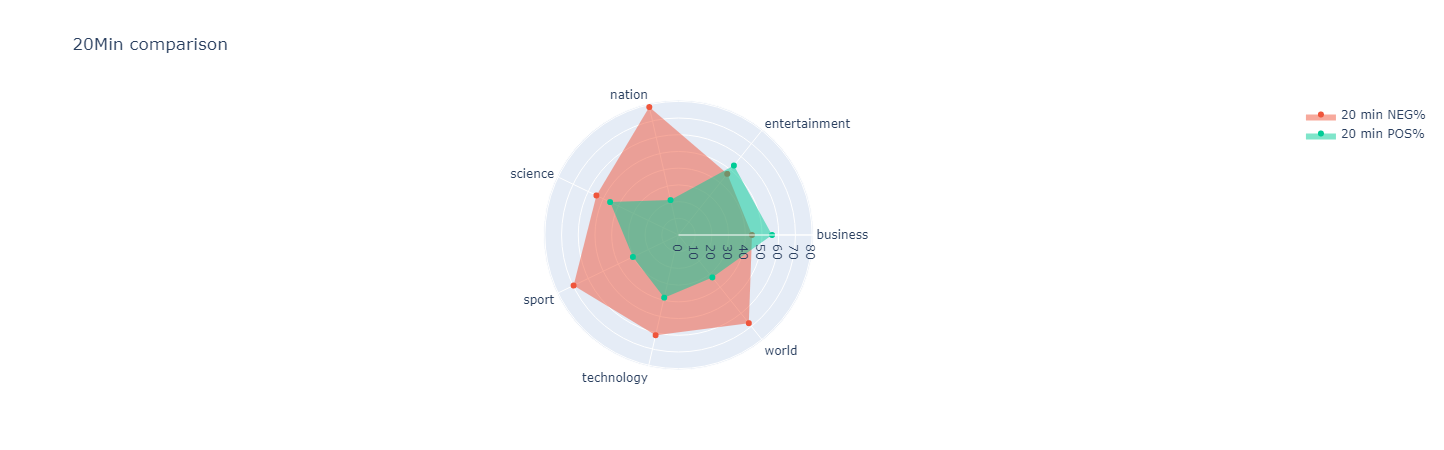

In [384]:
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
        r=df_20min_neg['sentiment %'],
        theta=df_20min_neg['category'], 
        fill='toself',
        mode = 'markers',
        name='20 min NEG%',
        line_color = '#ef553b',
    ))
fig.add_trace(go.Scatterpolar(
        r=df_20min_pos['sentiment %'],
        theta=df_20min_pos['category'], 
        #theta= ['world', 'technology','sport','science','nation','entertainment','business'],
        fill='toself',
        mode = 'markers',
        name='20 min POS%',
        line_color = '#00cc96',

    ))


fig.update_layout(
    title = '20Min comparison',
    showlegend = True
)

fig.show()

#### SRF

In [132]:
df_srf = sourceCat.loc[sourceCat['source'] == 'schweizer radio und fernsehen (srf)']
df_srf = df_srf.groupby(['category']).apply(norm).reset_index(drop=True)

In [133]:
df_srf_pos = df_srf.loc[df_srf['sentiment'] == '1']
df_srf_neg = df_srf.loc[df_srf['sentiment'] == '0']

In [136]:
df_srf

,source,category,sentiment,count,sentiment %
0,schweizer radio und fernsehen (srf),business,0,5,62.50
1,schweizer radio und fernsehen (srf),business,1,3,37.50
2,schweizer radio und fernsehen (srf),entertainment,0,1,50.00
3,schweizer radio und fernsehen (srf),entertainment,1,1,50.00
4,schweizer radio und fernsehen (srf),nation,0,7,100.00
5,schweizer radio und fernsehen (srf),science,0,5,55.56
6,schweizer radio und fernsehen (srf),science,1,4,44.44
7,schweizer radio und fernsehen (srf),sport,0,13,28.89
8,schweizer radio und fernsehen (srf),sport,1,32,71.11
9,schweizer radio und fernsehen (srf),technology,0,3,60.00


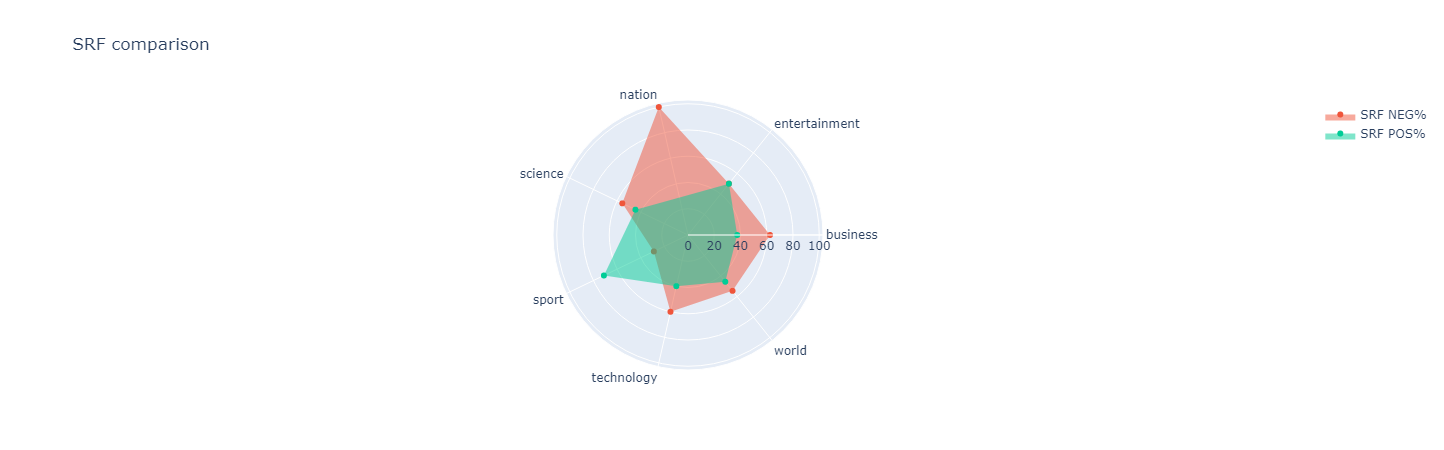

In [134]:
figSrf = go.Figure()
figSrf.add_trace(go.Scatterpolar(
        r=df_srf_neg['sentiment %'],
        #theta=df_20min_neg['category'], 
        theta= df_srf_neg['category'],
        fill='toself',
        mode = 'markers',
        name='SRF NEG%',
        line_color = '#ef553b'
    ))

figSrf.add_trace(go.Scatterpolar(
        r=df_srf_pos['sentiment %'],
        #theta=df_20min_pos['category'], 
        theta= df_srf_pos['category'],
        fill='toself',
        mode = 'markers',
        name='SRF POS%',
        line_color = '#00cc96'
    ))

figSrf.update_layout(
    title = 'SRF comparison',
    showlegend = True
)

figSrf.show()

# Plot in Time

In [80]:
def create_df_time(df_filter, subject):
    df = df_filter.groupby(['date_parsed',subject,'sentiment']).size().reset_index()
    df['sentiment'] = df['sentiment'].astype(str)
    df = df.rename(columns={0:'count'})
    df = normalize(df)
    
    df_pos= df.loc[df['sentiment'] == '1']
    df_neg = df.loc[df['sentiment'] == '0']
    # quanto ha influito un giornale(pos neg) in % per giorno 
    df_pos = df_pos.groupby(['date_parsed']).apply(norm).reset_index(drop=True)
    df_neg = df_neg.groupby(['date_parsed']).apply(norm).reset_index(drop=True)
    df_pos[subject] = df_pos[subject].astype(str) + '_pos' 
    df_neg[subject] = df_neg[subject].astype(str) + '_neg' 
    df_concat = pd.concat([df_pos,df_neg],ignore_index=True)
    
    test = df_concat.pivot(index=subject,columns='date_parsed', values='sentiment %')
    test = test.fillna(0)
    test = test.reset_index()
    return test

## Plot newspaper in time

In [81]:
newspaper_source = [
    '20 minuten',
    'blick',
    #'bluewin.ch',
    #'finews.ch',
    
    #'nau.ch',
    #'neue zürcher zeitung',
    'srf',
    #'telebasel',
    #'tages-anzeiger',
    #'watson'
]

In [82]:
news_small = news_concat[news_concat.source.isin(newspaper_source)]

In [83]:
# Filter data between two dates
filtered_df = news_small.loc[(news_small['date_parsed'] >= '2021-05-01') & (news_small['date_parsed']<= '2021-05-31')]

In [84]:
filtered_df

,source,content,category,sentiment,date_parsed
0,20 minuten,Verletzung im Schädelinneren : Frau lief nach Corona-Test Hirnwasser aus dem Kopf. In Osnabrück ist eine Frau beim Corona-Schnelltest im Inneren ihres Schädels verletzt worden. Danach lief ihr wochenlang Hirnwasser aus dem Kopf.,world,0,2021-05-01
1,blick,"USA: Freizeitpark wieder auf. 13 Monate lang war Disneyland wegen der Corona-Pandemie stillgelegt, nun hat der beliebte Freizeitpark in Kalifornien wieder auf.",world,1,2021-05-01
2,20 minuten,"Verdacht auf Menschenschmuggel : US-Polizei findet 91 Menschen ohne Papiere in Wohnhaus. Auf Hinweis einer Entführung finden Polizeibeamte in Houston, im US-Bundesstaat Texas, 91 Frauen und Männer ohne gültige Aufenthaltspapiere.",world,0,2021-05-01
10,blick,"Ironman: Ryf läuft mit Streckenrekord zu Sieg in St. George. In St. George feiert Daniela Ryf ihren zweiten Saisonsieg in einem 70.3-Ironman. Ein gutes Omen für die Mitteldistanz-WM, die im September auf der gleichen Strecke durchgeführt wird.",world,1,2021-05-01
12,srf,32. Runde der Super League - Luzern verschafft sich weiter Luft im Abstiegskampf. Der FC Luzern gewinnt bei Vaduz 2:1 und baut den Vorsprung auf den Barrageplatz auf 9 Punkte aus.,world,1,2021-05-01
...,...,...,...,...,...
3501,blick,Premier League: Liverpool gewinnt Nachholspiel gegen ManUtd. Liverpool holt sich im Nachholspiel gegen Manchester United einen wichtigen Sieg. Vor der Partie kommts allerdings erneut zu Fan-Protesten.,sport,1,2021-05-13
3502,blick,"Nach Fotos von Kobe Bryants Absturz - zwei Feuerwehrmänner gefeuert. Sie waren bei Kobe Bryants (†41) Helikopterabsturz im Einsatz: Zwei Feuerwehrleute in Los Angeles verlieren ihren Job, weil sie Fotos von der Unfallstelle gemacht haben.",sport,0,2021-05-13
3503,blick,"Radsport: Gino Mäder gewinnt Bergankunft am Giro. Drei Kilometer vor dem Ziel lässt der Schweizer Gino Mäder (24, Bahrain Victorious) seine letzten beiden Begleiter stehen und gewinnt die 6. Etappe des Giro d'Italia in Ascoli Piceno.",sport,1,2021-05-13
3504,srf,Schweizer Sieg beim Giro - Paukenschlag beim Giro: Gino Mäder siegt auf der 6. Etappe. Der Fahrer vom Team Bahrain Victorious siegt in Ascoli Pieno. Zuvor hatte er sich von einer Ausreissergruppe abgesetzt.,sport,1,2021-05-13


In [85]:
source_time = create_df_time(filtered_df, 'source')

In [86]:
source_time

date_parsed,source,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,...,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25
0,20 minuten_neg,34.38,57.58,39.39,42.5,45.00,38.64,29.03,24.24,41.18,...,34.78,51.02,35.56,45.45,42.86,35.14,29.41,20.69,31.25,46.15
1,20 minuten_pos,9.09,35.29,43.75,35.0,41.18,39.29,47.83,33.33,44.44,...,27.03,38.46,33.33,26.47,29.41,48.48,23.81,36.84,13.33,44.44
2,blick_neg,56.25,36.36,42.42,42.5,40.00,50.00,61.29,51.52,35.29,...,43.48,36.73,46.67,36.36,37.14,54.05,52.94,37.93,59.38,26.92
3,blick_pos,63.64,47.06,37.50,40.0,38.24,35.71,30.43,33.33,22.22,...,40.54,38.46,45.83,47.06,35.29,33.33,23.81,36.84,60.00,22.22
4,srf_neg,9.38,6.06,18.18,15.0,15.00,11.36,9.68,24.24,23.53,...,21.74,12.24,17.78,18.18,20.00,10.81,17.65,41.38,9.38,26.92
5,srf_pos,27.27,17.65,18.75,25.0,20.59,25.00,21.74,33.33,33.33,...,32.43,23.08,20.83,26.47,35.29,18.18,52.38,26.32,26.67,33.33


## Plot category in time


In [87]:
big_filtered_df = news_concat.loc[(news_concat['date_parsed'] >= '2021-05-01') & (news_concat['date_parsed']<= '2021-05-31')]

In [88]:
cat_time = create_df_time(big_filtered_df, 'category')

In [89]:
cat_time

date_parsed,category,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,...,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25
0,business_neg,3.70,4.55,11.84,8.14,10.23,8.33,4.23,0.00,4.11,...,5.71,6.73,9.00,13.27,7.14,12.50,5.71,0.00,3.08,2.04
1,business_pos,4.35,4.76,8.00,16.07,21.31,14.29,3.45,6.12,2.50,...,1.75,15.71,22.22,12.20,11.67,15.00,0.00,7.69,2.17,3.57
2,entertainment_neg,9.26,10.61,3.95,11.63,10.23,6.25,11.27,5.56,8.22,...,8.57,8.65,9.00,13.27,19.05,12.50,8.57,7.14,10.77,6.12
3,entertainment_pos,4.35,7.14,8.00,10.71,21.31,17.46,10.34,2.04,5.00,...,15.79,11.43,12.70,8.54,10.00,12.50,10.87,20.51,19.57,14.29
4,health_neg,9.26,9.09,22.37,15.12,12.50,17.71,15.49,26.39,20.55,...,8.57,9.62,13.00,6.19,13.10,10.42,11.43,11.43,4.62,6.12
5,health_pos,6.52,7.14,12.00,10.71,3.28,15.87,8.62,24.49,17.50,...,1.75,2.86,3.17,15.85,6.67,11.25,8.70,5.13,6.52,7.14
6,nation_neg,12.96,9.09,9.21,10.47,7.95,6.25,8.45,8.33,12.33,...,5.71,6.73,8.00,7.96,8.33,9.38,11.43,4.29,12.31,8.16
7,nation_pos,4.35,0.00,6.00,0.00,3.28,4.76,10.34,4.08,2.50,...,3.51,5.71,9.52,1.22,5.00,2.50,4.35,0.00,4.35,0.00
8,science_neg,14.81,15.15,14.47,13.95,17.05,17.71,18.31,5.56,12.33,...,18.57,10.58,19.00,11.50,15.48,16.67,12.86,18.57,12.31,14.29
9,science_pos,19.57,14.29,24.00,17.86,13.11,11.11,20.69,16.33,10.00,...,5.26,17.14,9.52,13.41,20.00,16.25,19.57,2.56,10.87,3.57


## Export

--------------------
### How I created the time part before the function, step by step (do not run)
how to:

In [476]:
plot_time_df = filtered_df.groupby(['date_parsed','source','sentiment']).size().reset_index()
plot_time_df['sentiment'] = plot_time_df['sentiment'].astype(str)
plot_time_df = plot_time_df.rename(columns={0:'count'})
plot_time_df = normalize(plot_time_df)
plot_time_df

,date_parsed,source,sentiment,count,sentiment %
0,2021-05-01,20 minuten,0,11,1.42
1,2021-05-01,20 minuten,1,2,0.26
2,2021-05-01,blick,0,18,2.33
3,2021-05-01,blick,1,14,1.81
4,2021-05-01,schweizer radio und fernsehen (srf),0,3,0.39
...,...,...,...,...,...
78,2021-05-14,20 minuten,0,5,0.65
79,2021-05-14,20 minuten,1,1,0.13
80,2021-05-14,blick,0,6,0.78
81,2021-05-14,schweizer radio und fernsehen (srf),0,3,0.39


In [477]:
time_pos= plot_time_df.loc[plot_time_df['sentiment'] == '1']
time_neg = plot_time_df.loc[plot_time_df['sentiment'] == '0']

In [478]:
# quanto ha influito un giornale(pos neg) in % per giorno 
time_pos = time_pos.groupby(['date_parsed']).apply(norm).reset_index(drop=True)
time_neg = time_neg.groupby(['date_parsed']).apply(norm).reset_index(drop=True)

In [479]:
time_pos['source'] = time_pos['source'].astype(str) + '_pos' 
time_neg['source'] = time_neg['source'].astype(str) + '_neg' 

In [480]:
time_011 = time_pos.loc[time_pos['date_parsed'] == '2021-05-01']
time_011

,date_parsed,source,sentiment,count,sentiment %
0,2021-05-01,20 minuten_pos,1,2,9.09
1,2021-05-01,blick_pos,1,14,63.64
2,2021-05-01,schweizer radio und fernsehen (srf)_pos,1,6,27.27


In [481]:
time_concat = pd.concat([time_pos,time_neg],ignore_index=True)

In [482]:
time_concat

,date_parsed,source,sentiment,count,sentiment %
0,2021-05-01,20 minuten_pos,1,2,9.09
1,2021-05-01,blick_pos,1,14,63.64
2,2021-05-01,schweizer radio und fernsehen (srf)_pos,1,6,27.27
3,2021-05-02,20 minuten_pos,1,6,35.29
4,2021-05-02,blick_pos,1,8,47.06
...,...,...,...,...,...
78,2021-05-13,blick_neg,0,10,35.71
79,2021-05-13,schweizer radio und fernsehen (srf)_neg,0,2,7.14
80,2021-05-14,20 minuten_neg,0,5,35.71
81,2021-05-14,blick_neg,0,6,42.86


## Pivot

In [483]:
test = time_concat.pivot(index='source',columns='date_parsed', values='sentiment %')

In [484]:
test = test.fillna(0)

In [485]:
test = test.reset_index()

In [486]:
test

date_parsed,source,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,2021-05-06,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14
0,20 minuten_neg,34.38,57.58,39.39,42.5,45.00,38.64,29.03,24.24,41.18,41.67,29.73,37.14,57.14,35.71
1,20 minuten_pos,9.09,35.29,43.75,35.0,41.18,39.29,47.83,33.33,44.44,30.00,22.22,41.38,23.08,50.00
2,blick_neg,56.25,36.36,42.42,42.5,40.00,50.00,61.29,51.52,35.29,30.56,43.24,37.14,35.71,42.86
3,blick_pos,63.64,47.06,37.50,40.0,38.24,35.71,30.43,33.33,22.22,45.00,40.74,37.93,30.77,0.00
4,schweizer radio und fernsehen (srf)_neg,9.38,6.06,18.18,15.0,15.00,11.36,9.68,24.24,23.53,27.78,27.03,25.71,7.14,21.43
5,schweizer radio und fernsehen (srf)_pos,27.27,17.65,18.75,25.0,20.59,25.00,21.74,33.33,33.33,25.00,37.04,20.69,46.15,50.00
